利用币安的跨币种保证金策略，利用BTC做空山寨币(市值>2亿美金)，要配置一些没有炒作价值的币
初步执行计划如下：
1. 假设有1万U价值btc，用btc做保证金分成50份每个币分200，再把200分3份每份67U
2. 在fomo大涨后,建首单67U单子,陆续伴随fomo行情开个50个交易对
3. 如果被套超过15-30%,则再加仓67U
4. 最大开到1万价值的仓位,分散在50个交易对

隐藏条件：
1. BTC占整个市场全部价值的比重变化


# 用python获取BTC 市值占比

In [5]:
from pycoingecko import CoinGeckoAPI

def get_market_data():
    cg = CoinGeckoAPI()
    
    # 获取市场总市值数据
    global_data = cg.get_global()
    total_market_cap = global_data['total_market_cap']['usd']

    # 获取 BTC 市值数据
    btc_data = cg.get_coin_by_id('bitcoin')
    btc_market_cap = btc_data['market_data']['market_cap']['usd']

    # 计算 BTC 市值占比
    btc_market_cap_percentage = (btc_market_cap / total_market_cap) * 100
    print(f"BTC 市值占比：{btc_market_cap_percentage:.2f}%")

if __name__ == "__main__":
    get_market_data()


BTC 市值占比：43.98%


# 用python获取山寨币基于btc的价格的相对走势

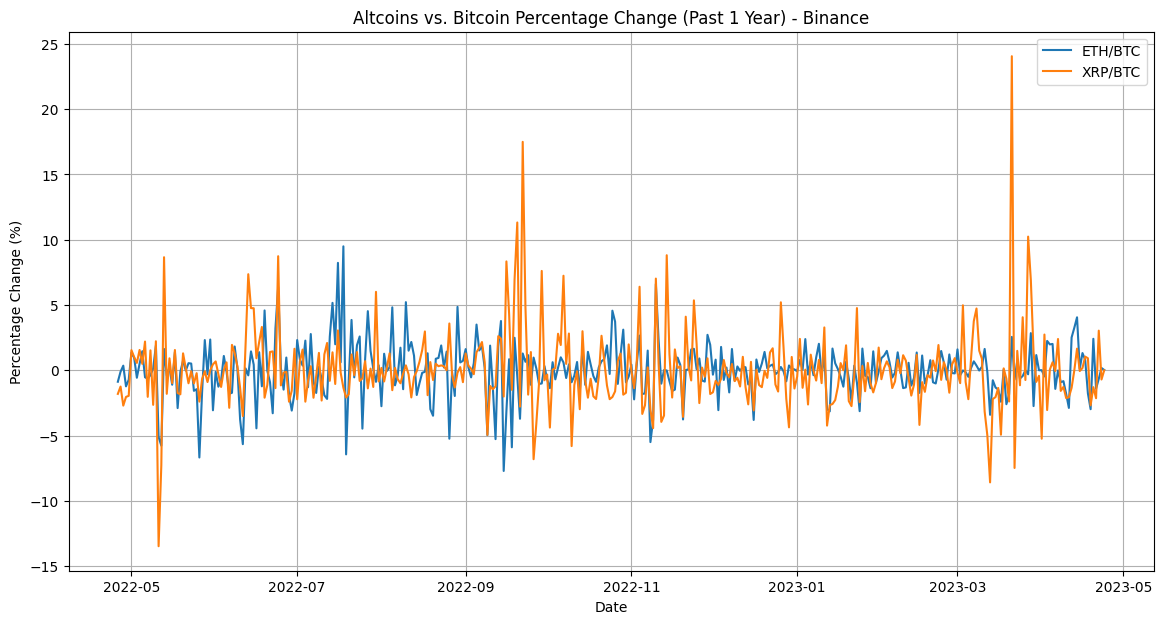

In [8]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

def fetch_ohlcv(exchange, symbol, timeframe):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
    return pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

def plot_percentage_trends():
    exchange = ccxt.binance()

    # 获取过去一年的数据
    now = exchange.milliseconds()
    year_ago = now - 365 * 24 * 60 * 60 * 1000
    timeframe = '1d'

    # 获取以太坊 (ETH) 相对于比特币 (BTC) 的价格走势
    eth_prices = fetch_ohlcv(exchange, 'ETH/BTC', timeframe)
    eth_prices = eth_prices[eth_prices['timestamp'] >= year_ago]
    eth_prices['timestamp'] = pd.to_datetime(eth_prices['timestamp'], unit='ms')

    # 获取瑞波币 (XRP) 相对于比特币 (BTC) 的价格走势
    xrp_prices = fetch_ohlcv(exchange, 'XRP/BTC', timeframe)
    xrp_prices = xrp_prices[xrp_prices['timestamp'] >= year_ago]
    xrp_prices['timestamp'] = pd.to_datetime(xrp_prices['timestamp'], unit='ms')

    # 计算价格百分比变化
    eth_prices['percentage_change'] = eth_prices['close'].pct_change() * 100
    xrp_prices['percentage_change'] = xrp_prices['close'].pct_change() * 100

    # 绘制价格走势图
    plt.figure(figsize=(14, 7))
    plt.plot(eth_prices['timestamp'], eth_prices['percentage_change'], label='ETH/BTC')
    plt.plot(xrp_prices['timestamp'], xrp_prices['percentage_change'], label='XRP/BTC')

    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.title('Altcoins vs. Bitcoin Percentage Change (Past 1 Year) - Binance')
    plt.legend()
    plt.grid()

    plt.show()

if __name__ == "__main__":
    plot_percentage_trends()


# 用python筛选出，市值超过 2亿 美元的非稳定币山寨币

In [10]:
from pycoingecko import CoinGeckoAPI

def get_altcoins_with_market_cap_above(cap_usd):
    cg = CoinGeckoAPI()

    # 获取加密货币市场数据
    market_data = cg.get_coins_markets(vs_currency='usd')

    # 稳定币列表
    stablecoins = ['usdt', 'usdc', 'busd', 'dai', 'sai', 'pax', 'gusd', 'tusd', 'husd']

    # 筛选市值大于 cap_usd 且非稳定币的山寨币
    filtered_altcoins = [coin for coin in market_data if coin['market_cap'] > cap_usd and coin['symbol'] != 'btc' and coin['symbol'] not in stablecoins]

    return filtered_altcoins

if __name__ == "__main__":
    market_cap_threshold = 2e8  # 2亿美元
    altcoins = get_altcoins_with_market_cap_above(market_cap_threshold)

    print(f"市值超过 {market_cap_threshold} 美元的非稳定币山寨币：")
    for altcoin in altcoins:
        print(f"{altcoin['name']} (Symbol: {altcoin['symbol'].upper()}) - Market Cap: ${altcoin['market_cap']:,}")


市值超过 200000000.0 美元的非稳定币山寨币：
Ethereum (Symbol: ETH) - Market Cap: $221,774,406,643
BNB (Symbol: BNB) - Market Cap: $52,057,557,826
XRP (Symbol: XRP) - Market Cap: $23,776,323,460
Cardano (Symbol: ADA) - Market Cap: $13,577,009,745
Lido Staked Ether (Symbol: STETH) - Market Cap: $11,296,608,277
Dogecoin (Symbol: DOGE) - Market Cap: $10,939,295,435
Polygon (Symbol: MATIC) - Market Cap: $9,131,811,456
Solana (Symbol: SOL) - Market Cap: $8,409,750,763
Polkadot (Symbol: DOT) - Market Cap: $7,190,933,013
Litecoin (Symbol: LTC) - Market Cap: $6,353,728,730
Shiba Inu (Symbol: SHIB) - Market Cap: $6,069,005,048
TRON (Symbol: TRX) - Market Cap: $5,997,526,585
Avalanche (Symbol: AVAX) - Market Cap: $5,533,651,141
Wrapped Bitcoin (Symbol: WBTC) - Market Cap: $4,206,219,034
Uniswap (Symbol: UNI) - Market Cap: $4,062,399,852
Chainlink (Symbol: LINK) - Market Cap: $3,682,906,366
Toncoin (Symbol: TON) - Market Cap: $3,355,691,392
LEO Token (Symbol: LEO) - Market Cap: $3,256,653,500
Cosmos Hub (Symbol:

现在有两组数据，代表商品A和B的单价P_a,P_b，随时间变化的绝对价值

A=[10,12,14,8,6,14,19]

B=[3,4,3,2,4,7,9]

在第一年，我拥有n个单位的商品A,即N_a,N_a的初始值为1.

我在某一年把数量p的商品A作为抵押，M=p * N_a * 0.95 * P_a，M就是借款额度.

然后在同年我用M借了一些商品B，借的数量即为M/P_b.

然后我卖掉了这些商品B，我期待在某一年商品B单价低的时候再买入，还给贷款人，这样我就实现了一次做空。

可是，随着一段时间过去，没有得到合适的交易机会，卖出的B商品的价值可能已经大于保证金了

注意，由于保证金是由A的当前的价值决定的，所以保证金的价值也会随着时间的变化而变化，这个时候就会导致提前还款，要求提前把借入商品B还掉，这就叫做强制平仓。

问题：如何操作会触发这个强制平仓。

# 用python获取btc最近10天的每天的最低价,返回一个数组

In [2]:

import ccxt
import pandas as pd

# 初始化交易所
exchange = ccxt.binance()

# 获取BTC历史k线数据
ohlcv = exchange.fetch_ohlcv('BTC/USDT', '1d', limit=1000)

# 将数据转换为DataFrame格式
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# 以日K线为单位，获取历史最低价，并返回一个每日历史最低价的数组
BTC = df.groupby(pd.Grouper(freq='D')).min()['low'].tolist()


# 用python获取arp最近10天的每天最高价，返回一个数组

In [3]:
import ccxt
import pandas as pd

# 初始化交易所
exchange = ccxt.binance()

# 获取ARP历史k线数据
ohlcv = exchange.fetch_ohlcv('XRP/USDT', '1d', limit=1000)

# 将数据转换为DataFrame格式
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# 以日K线为单位，获取历史最高价，并返回一个每日历史最高价的数组
XRP = df.groupby(pd.Grouper(freq='D')).max()['high'].tolist()



# 用python计算保证金率


计算从某一天开始的保证金率的变化图,

In [4]:
import matplotlib.pyplot as plt

global Discount_rate
Discount_rate = 0.95
start_day_index = 1  # Assume starting from the second day
initial_A_units = 1  # Default 1 BTC
# Calculate borrowed units


def calculate_margin_value(price, day_index):
    """Calculate the margin value."""
    deposit = initial_A_units * price[day_index] * Discount_rate
    return deposit

def borrowed_units(price_A, price_B, borrowed_day):
    """Calculate the borrowed units."""
    deposit = calculate_margin_value(price_A, borrowed_day)
    borrowed_units = deposit / price_B[borrowed_day]
    return borrowed_units

amount = borrowed_units(BTC, XRP, 0)
print("amount:", amount)

def calculate_margin_rate(price_A, price_B, day_index=None):
    """Calculate the margin rate."""
    deposit = calculate_margin_value(price_A, day_index)
    borrowed_B_value = amount * price_B[day_index]
    margin_rate = (deposit / borrowed_B_value) * 100
    return margin_rate


amount 41233.66995271298


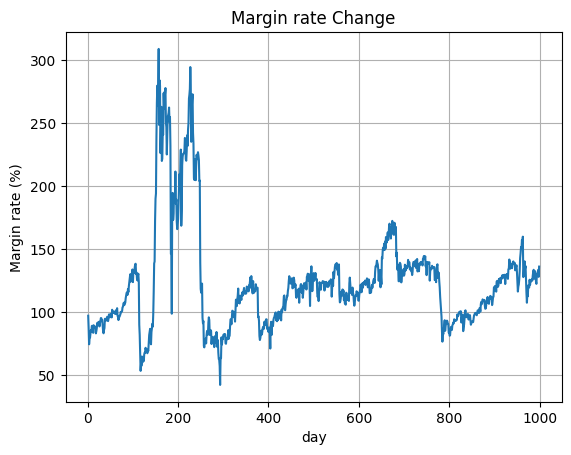

In [5]:


# Calculate margin rates from start_day_index
margin_rates = []
for day_index in range(start_day_index, len(BTC)):
    margin_rate = calculate_margin_rate(BTC, XRP, day_index)
    margin_rates.append(margin_rate)

# Plot margin rate change
plt.plot(range(start_day_index, len(BTC)), margin_rates)
plt.xlabel("day")
plt.ylabel("Margin rate (%)")
plt.title("Margin rate Change")
plt.grid(True)
plt.show()


BTC = [30120.0, 29240.65, 29096.78, 28520.0, 28010.0, 27125.0, 27140.35, 27311.25, 26942.82, 27321.58]
XRP = [0.5244, 0.521, 0.5391, 0.5375, 0.4993, 0.4792, 0.4761, 0.472, 0.4857, 0.4629]

用python 画一下BTC/XRP走势 百分比

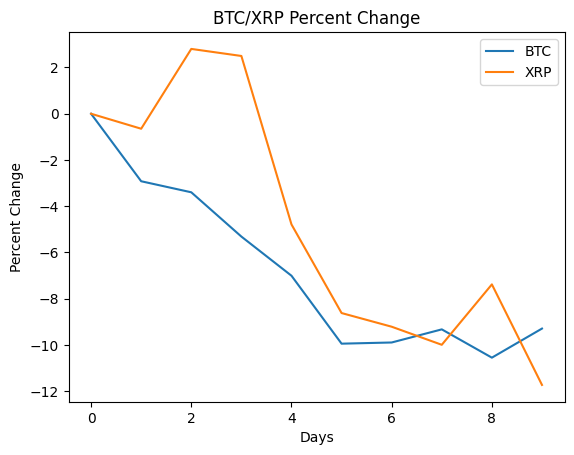

In [6]:
import matplotlib.pyplot as plt

# Price data
BTC = [30120.0, 29240.65, 29096.78, 28520.0, 28010.0, 27125.0, 27140.35, 27311.25, 26942.82, 27321.58]
XRP = [0.5244, 0.521, 0.5391, 0.5375, 0.4993, 0.4792, 0.4761, 0.472, 0.4857, 0.4629]

# Calculate percentage change from first values for each list
btc_pct = [(x - BTC[0]) / BTC[0] * 100 for x in BTC]
xrp_pct = [(x - XRP[0]) / XRP[0] * 100 for x in XRP]

# Plot the data
plt.plot(btc_pct, label='BTC')
plt.plot(xrp_pct, label='XRP')

# Add labels and legend
plt.xlabel('Days')
plt.ylabel('Percent Change')
plt.title('BTC/XRP Percent Change')
plt.legend()

# Show the plot
plt.show()


用Python研究一下最近1000天btc的总市值的变化

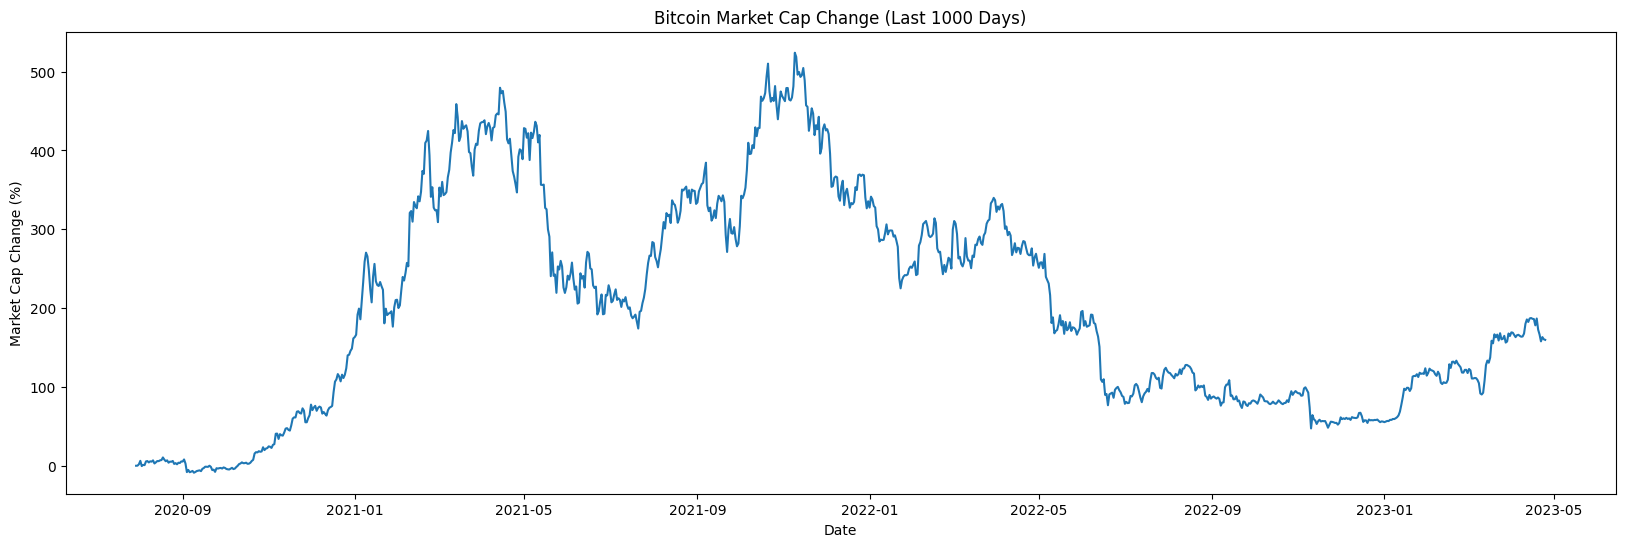

In [3]:
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime, timedelta


# 初始化CoinGeckoAPI对象
cg = CoinGeckoAPI()

# 获取BTC历史价格数据
data = cg.get_coin_market_chart_range_by_id(id='bitcoin', vs_currency='usd', from_timestamp=(datetime.now() - timedelta(days=1000)).timestamp(), to_timestamp=datetime.now().timestamp()) 

prices = data['prices']
market_cap = data['market_caps']

# 将时间戳转换为日期格式
dates = [datetime.fromtimestamp(price[0]/1000) for price in prices]

# 计算市值变化百分比
cap_changes = [(market_cap[i][1] - market_cap[0][1])/market_cap[0][1] * 100 for i in range(len(market_cap))]

# 绘制变化百分比图
plt.figure(figsize=(20,6))
plt.plot(dates, cap_changes)
plt.xlabel('Date')
plt.ylabel('Market Cap Change (%)')
plt.title('Bitcoin Market Cap Change (Last 1000 Days)')
plt.show()


BTC 市值占比：44.17%


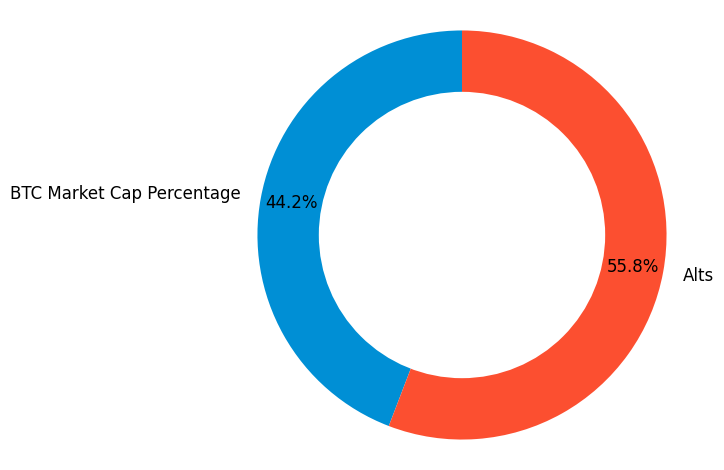

In [15]:
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt

def generate_pie_chart(btc_market_cap_percentage):
    labels = ['BTC Market Cap Percentage', 'Alts']
    sizes = [btc_market_cap_percentage, 100 - btc_market_cap_percentage]
    colors = ['#008fd5', '#fc4f30']
    text_props = {'color': 'black', 'fontsize': 12}
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops=text_props)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def get_market_data():
    cg = CoinGeckoAPI()
    
    # 获取市场总市值数据
    global_data = cg.get_global()
    total_market_cap = global_data['total_market_cap']['usd']

    # 获取 BTC 市值数据
    btc_data = cg.get_coin_by_id('bitcoin')
    btc_market_cap = btc_data['market_data']['market_cap']['usd']

    # 计算 BTC 市值占比
    btc_market_cap_percentage = (btc_market_cap / total_market_cap) * 100
    
    # 输出 BTC 市值占比
    print(f"BTC 市值占比：{btc_market_cap_percentage:.2f}%")

    # 生成饼图
    generate_pie_chart(btc_market_cap_percentage)

if __name__ == "__main__":
    get_market_data()

In [53]:
from datetime import datetime
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import pandas as pd


def get_historical_market_data(days):
    cg = CoinGeckoAPI()

    # 获取 BTC 历史市场数据
    btc_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=days)

    # 获取市场总市值数据
    global_data = cg.get_global()
    total_market_cap = global_data['total_market_cap']['usd']

    btc_market_caps = [i[1] for i in btc_data['market_caps']]
    btc_market_cap_percentages = []

    # 计算过去 n 天中每天的 BTC 市值占比
    for cap in btc_market_caps:
        percentage = (cap / total_market_cap) * 100
        btc_market_cap_percentages.append(percentage)

    # 绘制市值占比变化折线图
    dates = [datetime.fromtimestamp(i[0]/1000).strftime('%Y-%m-%d') for i in btc_data['market_caps']]
    df = pd.DataFrame({'date': dates, 'btc_market_cap_percentage': btc_market_cap_percentages})
    df['date'] = pd.to_datetime(df['date'])  # 将日期转换为 Pandas 的日期格式

    plt.figure(figsize=(20, 6))
    plt.plot(df['date'], df['btc_market_cap_percentage'])
    plt.title('BTC Market Cap Share')
    plt.xlabel('Date')
    plt.ylabel('BTC market cap share (%)')

    # 自动设置横坐标刻度
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))  # 最多显示 15 个横坐标刻度，自动调整间隔
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记

    label_interval = int(1000 / 15)

    label_interval = int(1000 / 15)

    # 为每隔label_interval个数据点添加标签
    label_points_x = []
    label_points_y = []
    for i, (x, y) in enumerate(zip(df['date'], df['btc_market_cap_percentage'])):
        if i % label_interval == 0:
            ax.annotate(f'{y:.2f}%', xy=(x, y), xytext=(5, -5), textcoords='offset points', fontsize=8)
            label_points_x.append(x)
            label_points_y.append(y)

    # 将标记的数据点标红
    plt.scatter(label_points_x, label_points_y, color='red', zorder=3)
    plt.show()


if __name__ == "__main__":
    get_historical_market_data(1000)


AttributeError: 'CoinGeckoAPI' object has no attribute 'get_global_market_chart'